<a href="https://colab.research.google.com/github/1hpDrew/Tensoflow/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential


import PIL

In [ ]:

import pathlib

dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos.tar',origin=dataset_url,extract=True)
data_dir=pathlib.Path(data_dir).with_suffix('')

228813984/228813984 [==============================] - 3s 0us/step


After downloading , you should now have copy of dataset available

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


There are total 3670 images

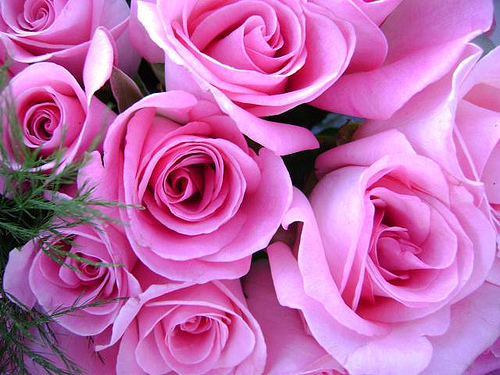

In [ ]:
roses=list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

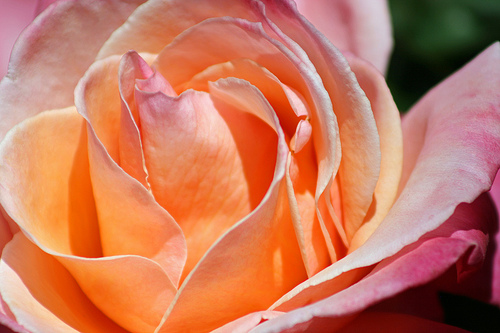

In [ ]:
PIL.Image.open(str(roses[1]))

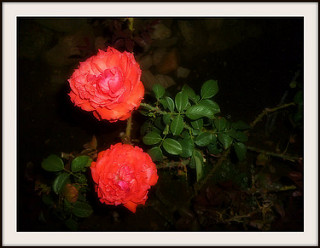

In [ ]:
PIL.Image.open(str(roses[2]))

and some tulips

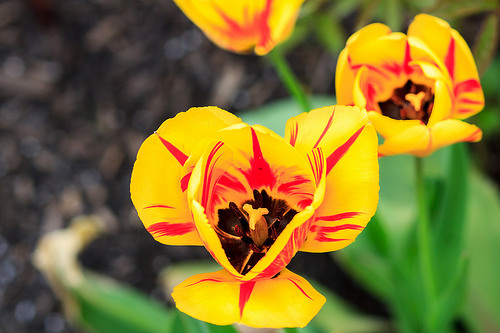

In [ ]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

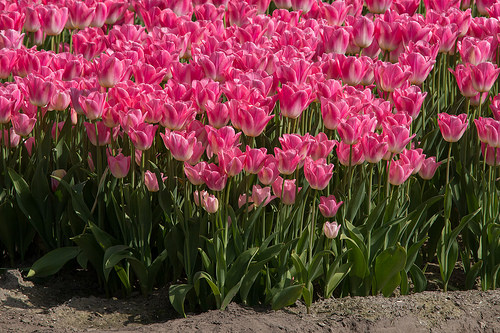

In [ ]:
PIL.Image.open(str(tulips[1]))

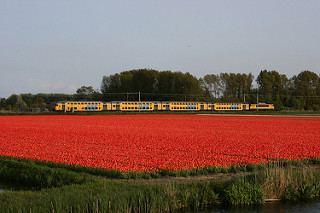

In [ ]:
PIL.Image.open(str(tulips[2]))

Create a dataset

In [ ]:
batch_size=32
img_height=180
img_width=180

In [ ]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


find the class names in the class_names attribute on these datasets.

In [ ]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


Visualize the data

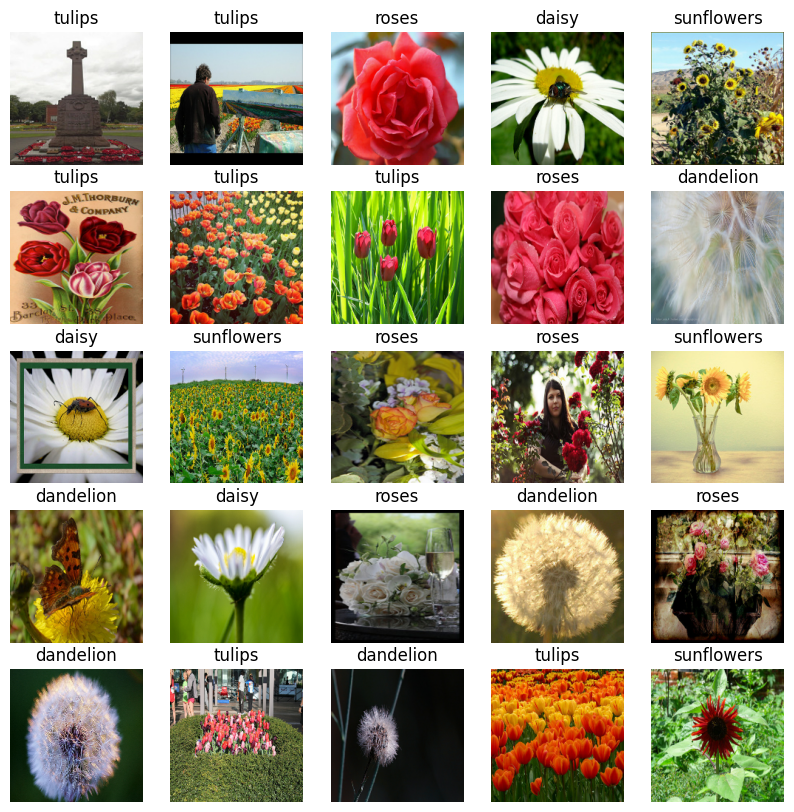

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for image,labels in train_ds.take(1):
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [ ]:
for image_batch,labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

#Configure Dataset for better performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Standardize the data

RGB channel values are in the [0, 255] range

In [ ]:
normalization_layer=layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


# Basic keras model

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compile Model


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Train The model


In [ ]:
epochs=10
history=model.fit(
    train_ds,validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 121s 1s/step - loss: 1.2943 - accuracy: 0.4516 - val_loss: 1.0869 - val_accuracy: 0.5422
Epoch 2/10
92/92 [==============================] - 107s 1s/step - loss: 0.9753 - accuracy: 0.6202 - val_loss: 1.0197 - val_accuracy: 0.5777
Epoch 3/10
92/92 [==============================] - 104s 1s/step - loss: 0.7941 - accuracy: 0.6931 - val_loss: 0.9029 - val_accuracy: 0.6403
Epoch 4/10
92/92 [==============================] - 104s 1s/step - loss: 0.6065 - accuracy: 0.7735 - val_loss: 0.9277 - val_accuracy: 0.6512
Epoch 5/10
92/92 [==============================] - 102s 1s/step - loss: 0.4018 - accuracy: 0.8542 - val_loss: 0.8903 - val_accuracy: 0.6730
Epoch 6/10
92/92 [==============================] - 101s 1s/step - loss: 0.2313 - accuracy: 0.9189 - val_loss: 1.0750 - val_accuracy: 0.6717
Epoch 7/10
92/92 [==============================] - 105s 1s/step - loss: 0.1484 - accuracy: 0.9567 - val_loss: 1.2736 - val_accuracy: 0.6567
Epoch 8/10
92

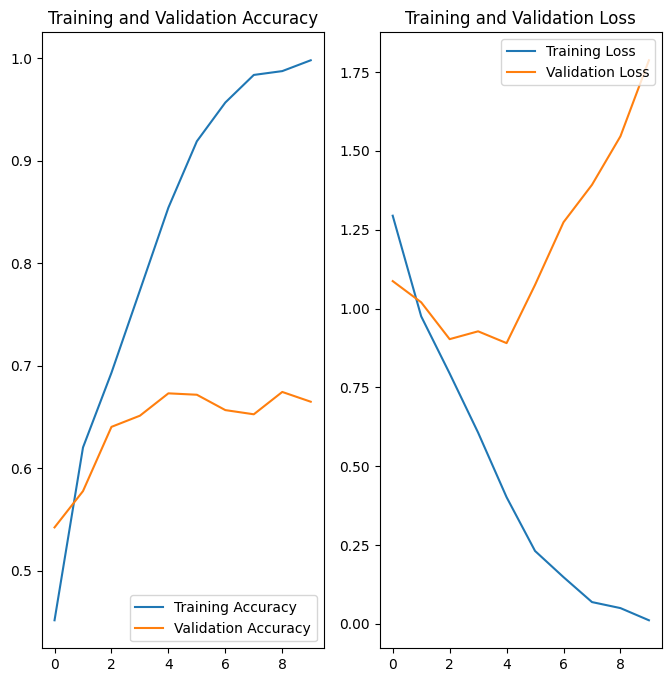

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()